1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import seaborn as sns
import math as mt
import scipy as sp


#reading the data and selecting the requested features
data = pd.read_csv("data/regression_generated.csv")
data = data[["features_1","features_2","features_3"]]

data


,features_1,features_2,features_3
0,2.175170,-0.285786,-0.603396
1,1.481941,-1.327870,-0.543583
2,-1.154394,-0.178649,-1.636646
3,0.197665,1.455707,1.562205
4,0.596676,0.969860,1.294158
...,...,...,...
1995,-1.820929,1.358539,-2.494838
1996,-0.883712,-0.063687,-0.418704
1997,-0.021394,-0.312864,-0.730848
1998,-0.041909,-0.862731,-1.232011


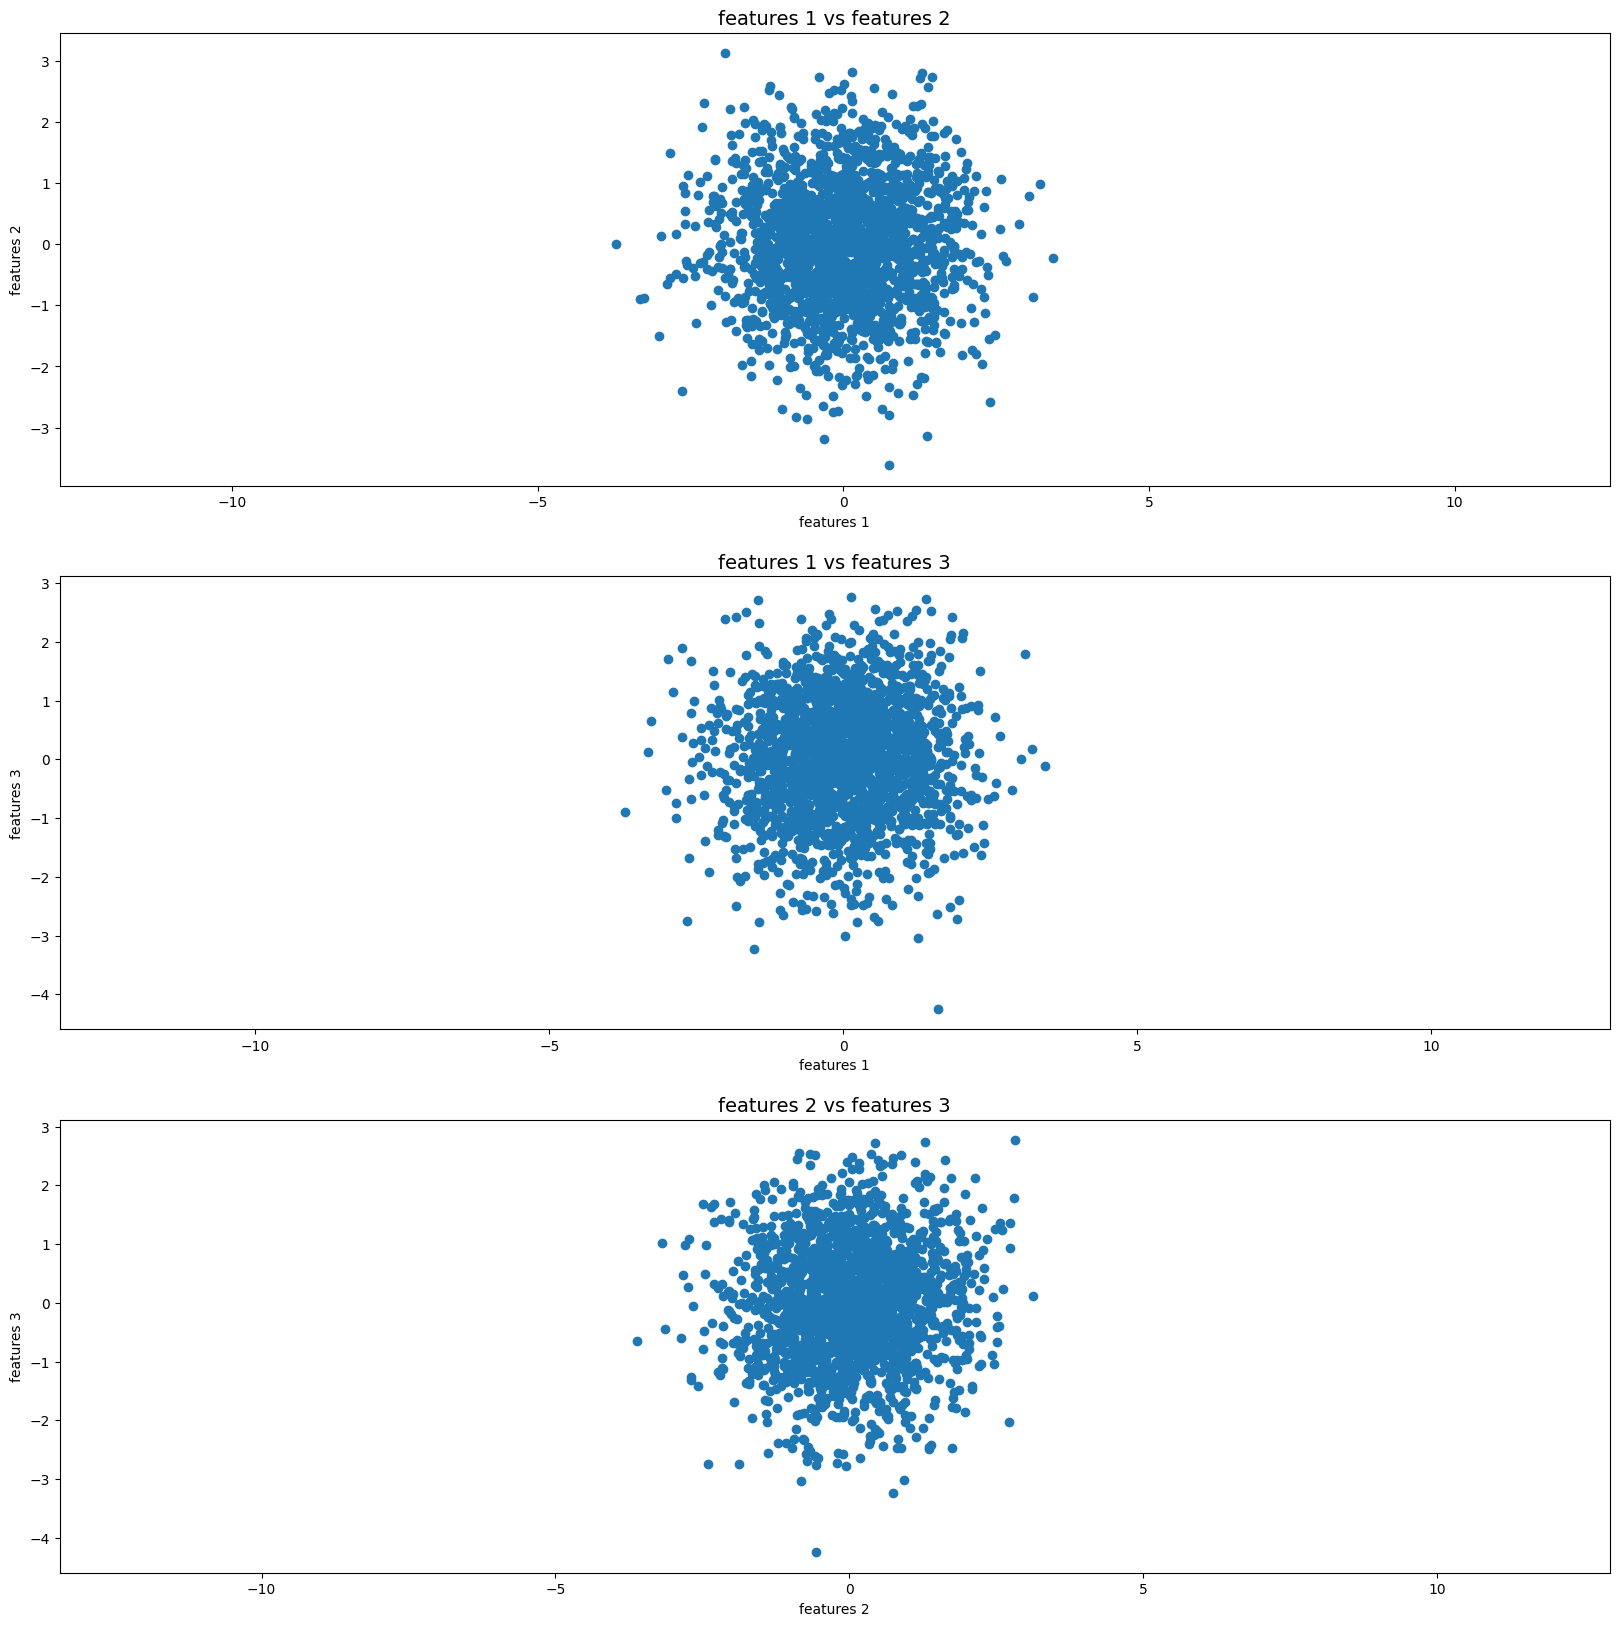

In [20]:
fig, axs = plt.subplots(3,figsize=(20, 20)) #creating the figure

i=0
inserted=[] 

for column1 in data.columns:
    for column2 in data.columns:
        
        #check if i try to plot the same figure or the same combination was alteady inserted
        if (column1 == column2):
            continue
        if([column1,column2] in inserted or [column2,column1] in inserted):
            continue
        
        #if not: plot it (replacing underscore with a space)
        axs[i].scatter(data[column1].values,data[column2].values)
        axs[i].axis('equal')
        axs[i].set_xlabel(column1.replace("_", " "))
        axs[i].set_ylabel(column2.replace("_", " "))
        axs[i].set_title(column1.replace("_", " ") + " vs " + column2.replace("_", " "), fontsize=14)
        
        
        i+=1 #next index in the figure
        inserted.append([column1,column2]) #saving the couple just plotted

#given the shape of the scatters plots there is no correlation between features


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

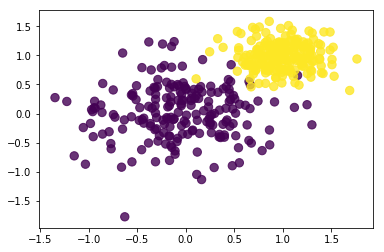

In [21]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')


In [22]:
def twoDgaussian(mean=[0,0],sd=[1,1],rho=0.5,n_samples=100):
    """
    Generate a dataset distributed as 2D gaussian distribution
    
    Paramenters:
    @mean:     list like, the mean of the random variables
    @sd:       list like, the standard deviations of the radom variables that form the multivariate gaussian
    @rho:      int/float the correlation between the two random variables
    @n_saples: int, the samples that must to be generated
    
    Return:
    @gaussian2D: numpy array, n_samples data distributed according to the insterted values
    """
    
    #computing the sigma matrix
    cov = np.ones((2,2))
    cov[0,0] = sd[0]**2
    cov[1,1] = sd[1]**2
    cov[0,1] = cov[1,0]=sd[0]*sd[1]*rho
    
    gaussian2D = np.random.multivariate_normal(mean, cov, size=n_samples)
    
    return gaussian2D

Text(0, 0.5, 'y')

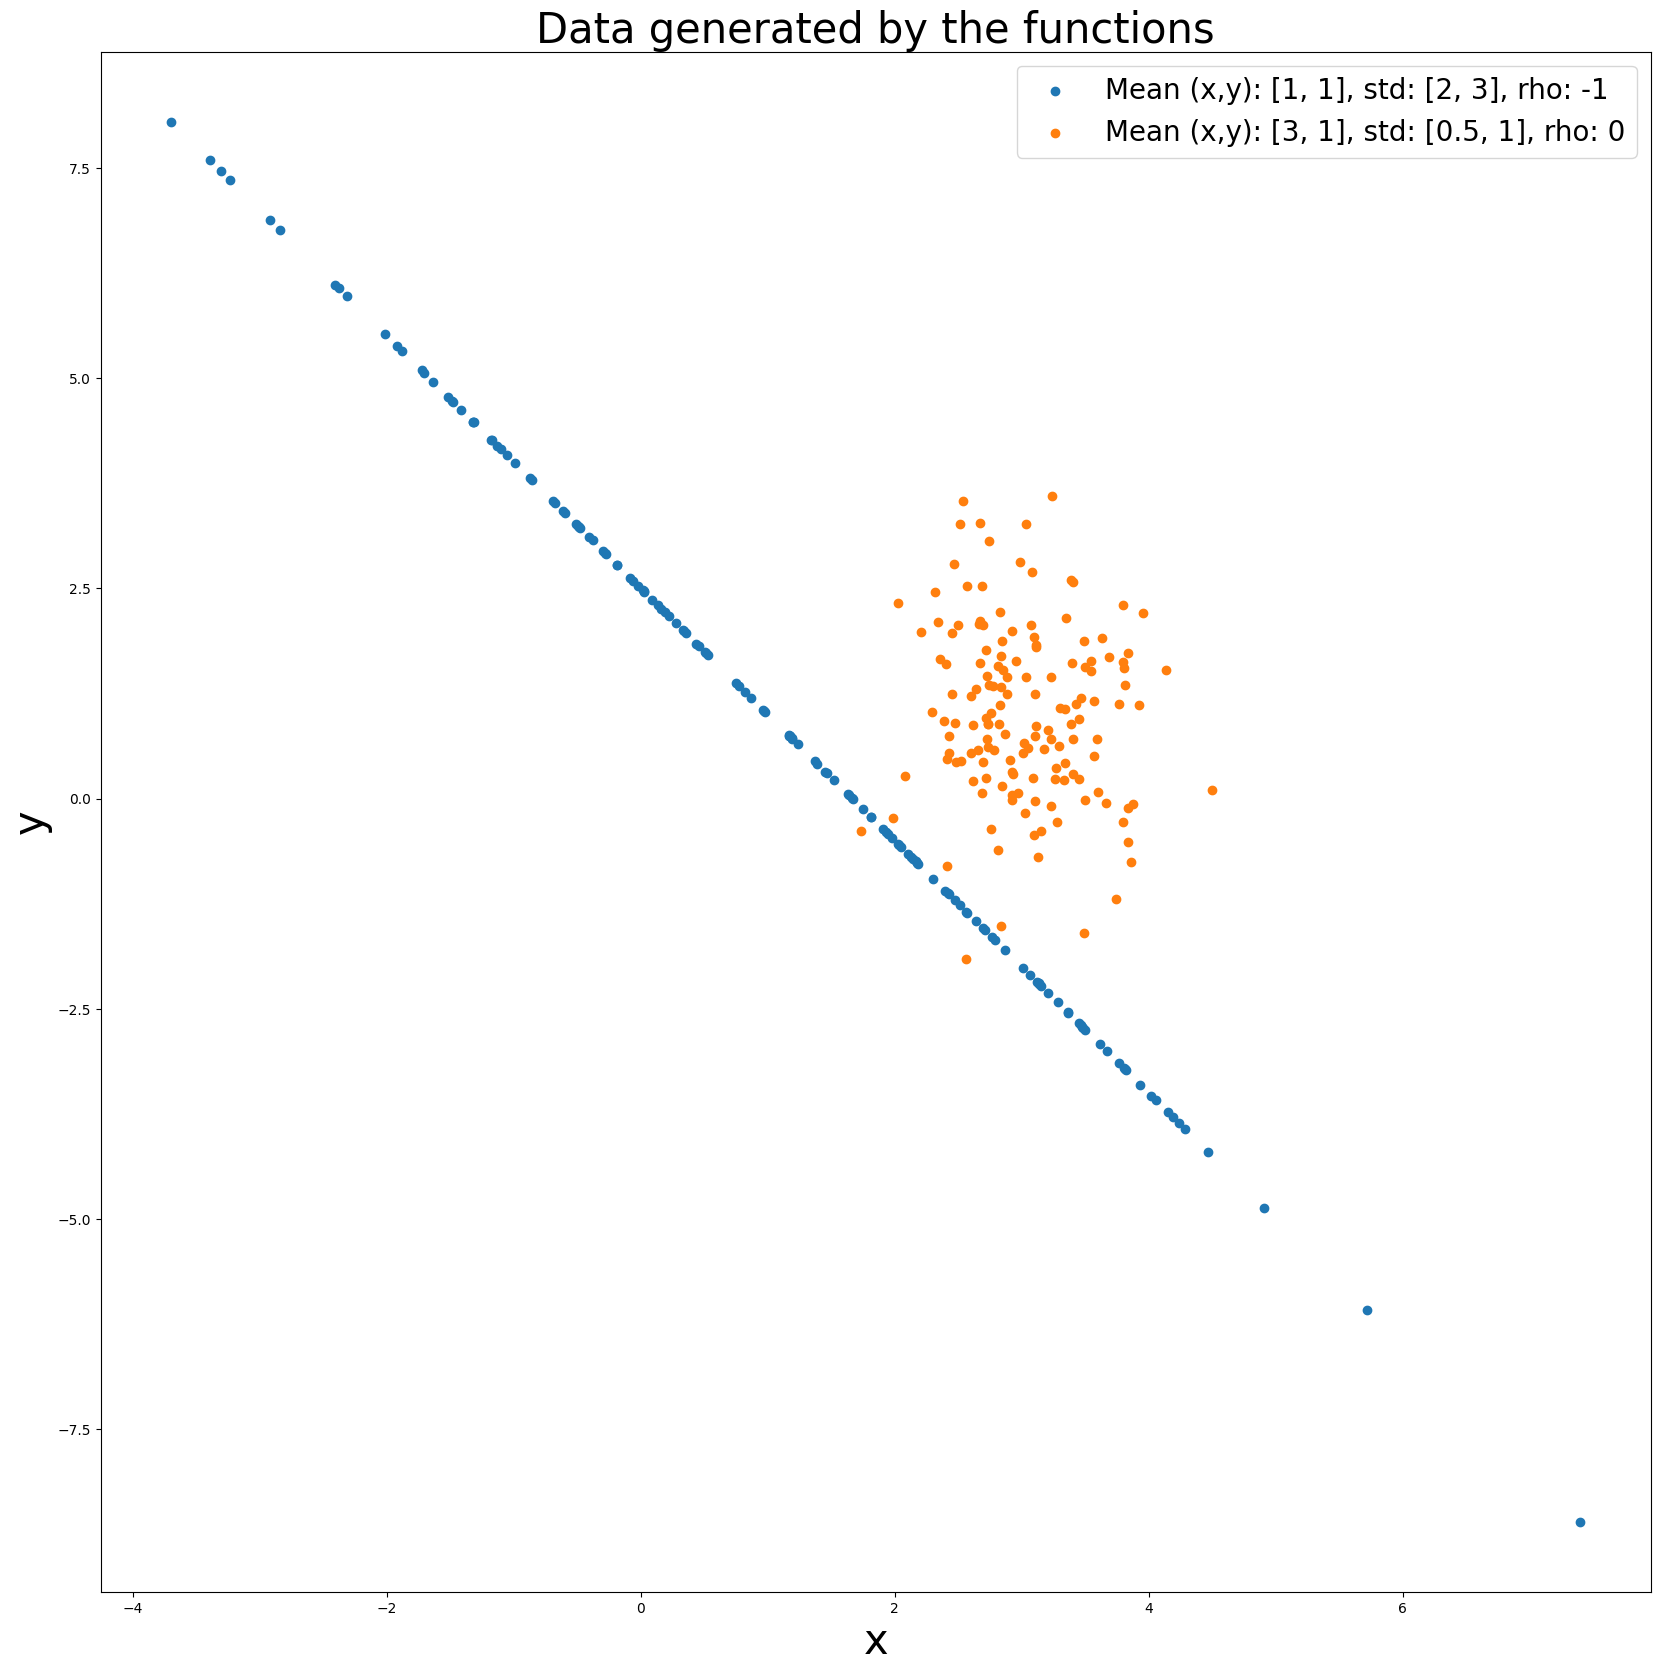

In [23]:
#parameters of the multivariate gaussian
mean11 = 1
mean12 = 1
sigma11 = 2
sigma12 = 3
rho1 = -1 

mean21 = 3
mean22 = 1
sigma21 = 0.5
sigma22 = 1
rho2 = 0 

#generation of the data
data1 = twoDgaussian(mean=[mean11,mean12],sd=[sigma11,sigma12],rho = rho1,n_samples=150)
data2 = twoDgaussian(mean=[mean21,mean22],sd=[sigma21,sigma22],rho = rho2,n_samples=150)

#labels for the plots

label1 = "Mean (x,y): " +str([mean11,mean12])+", std: "+str([sigma11,sigma12])+", rho: "+str(rho1)
label2 = "Mean (x,y): " +str([mean21,mean22])+", std: "+str([sigma21,sigma22])+", rho: "+str(rho2)

#plot
fig, axs = plt.subplots(1,figsize=(20, 20))
axs.scatter(data1[:,0],data1[:,1],label=label1)
axs.scatter(data2[:,0],data2[:,1],label=label2)
axs.legend(fontsize=20)
axs.set_title("Data generated by the functions", fontsize=30)
axs.set_xlabel("x",fontsize=30)
axs.set_ylabel("y",fontsize=30)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [25]:
#reading pickle file
inputfile= open("data/residuals_261.pkl", 'rb') 
data = pickle.load(inputfile).reshape(1)
inputfile.close()

#converting it into a dataframe
df = pd.DataFrame(data[0])
df = df[np.abs(df["residuals"])<2] #selecting the rows accorting to the requested condition
df


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


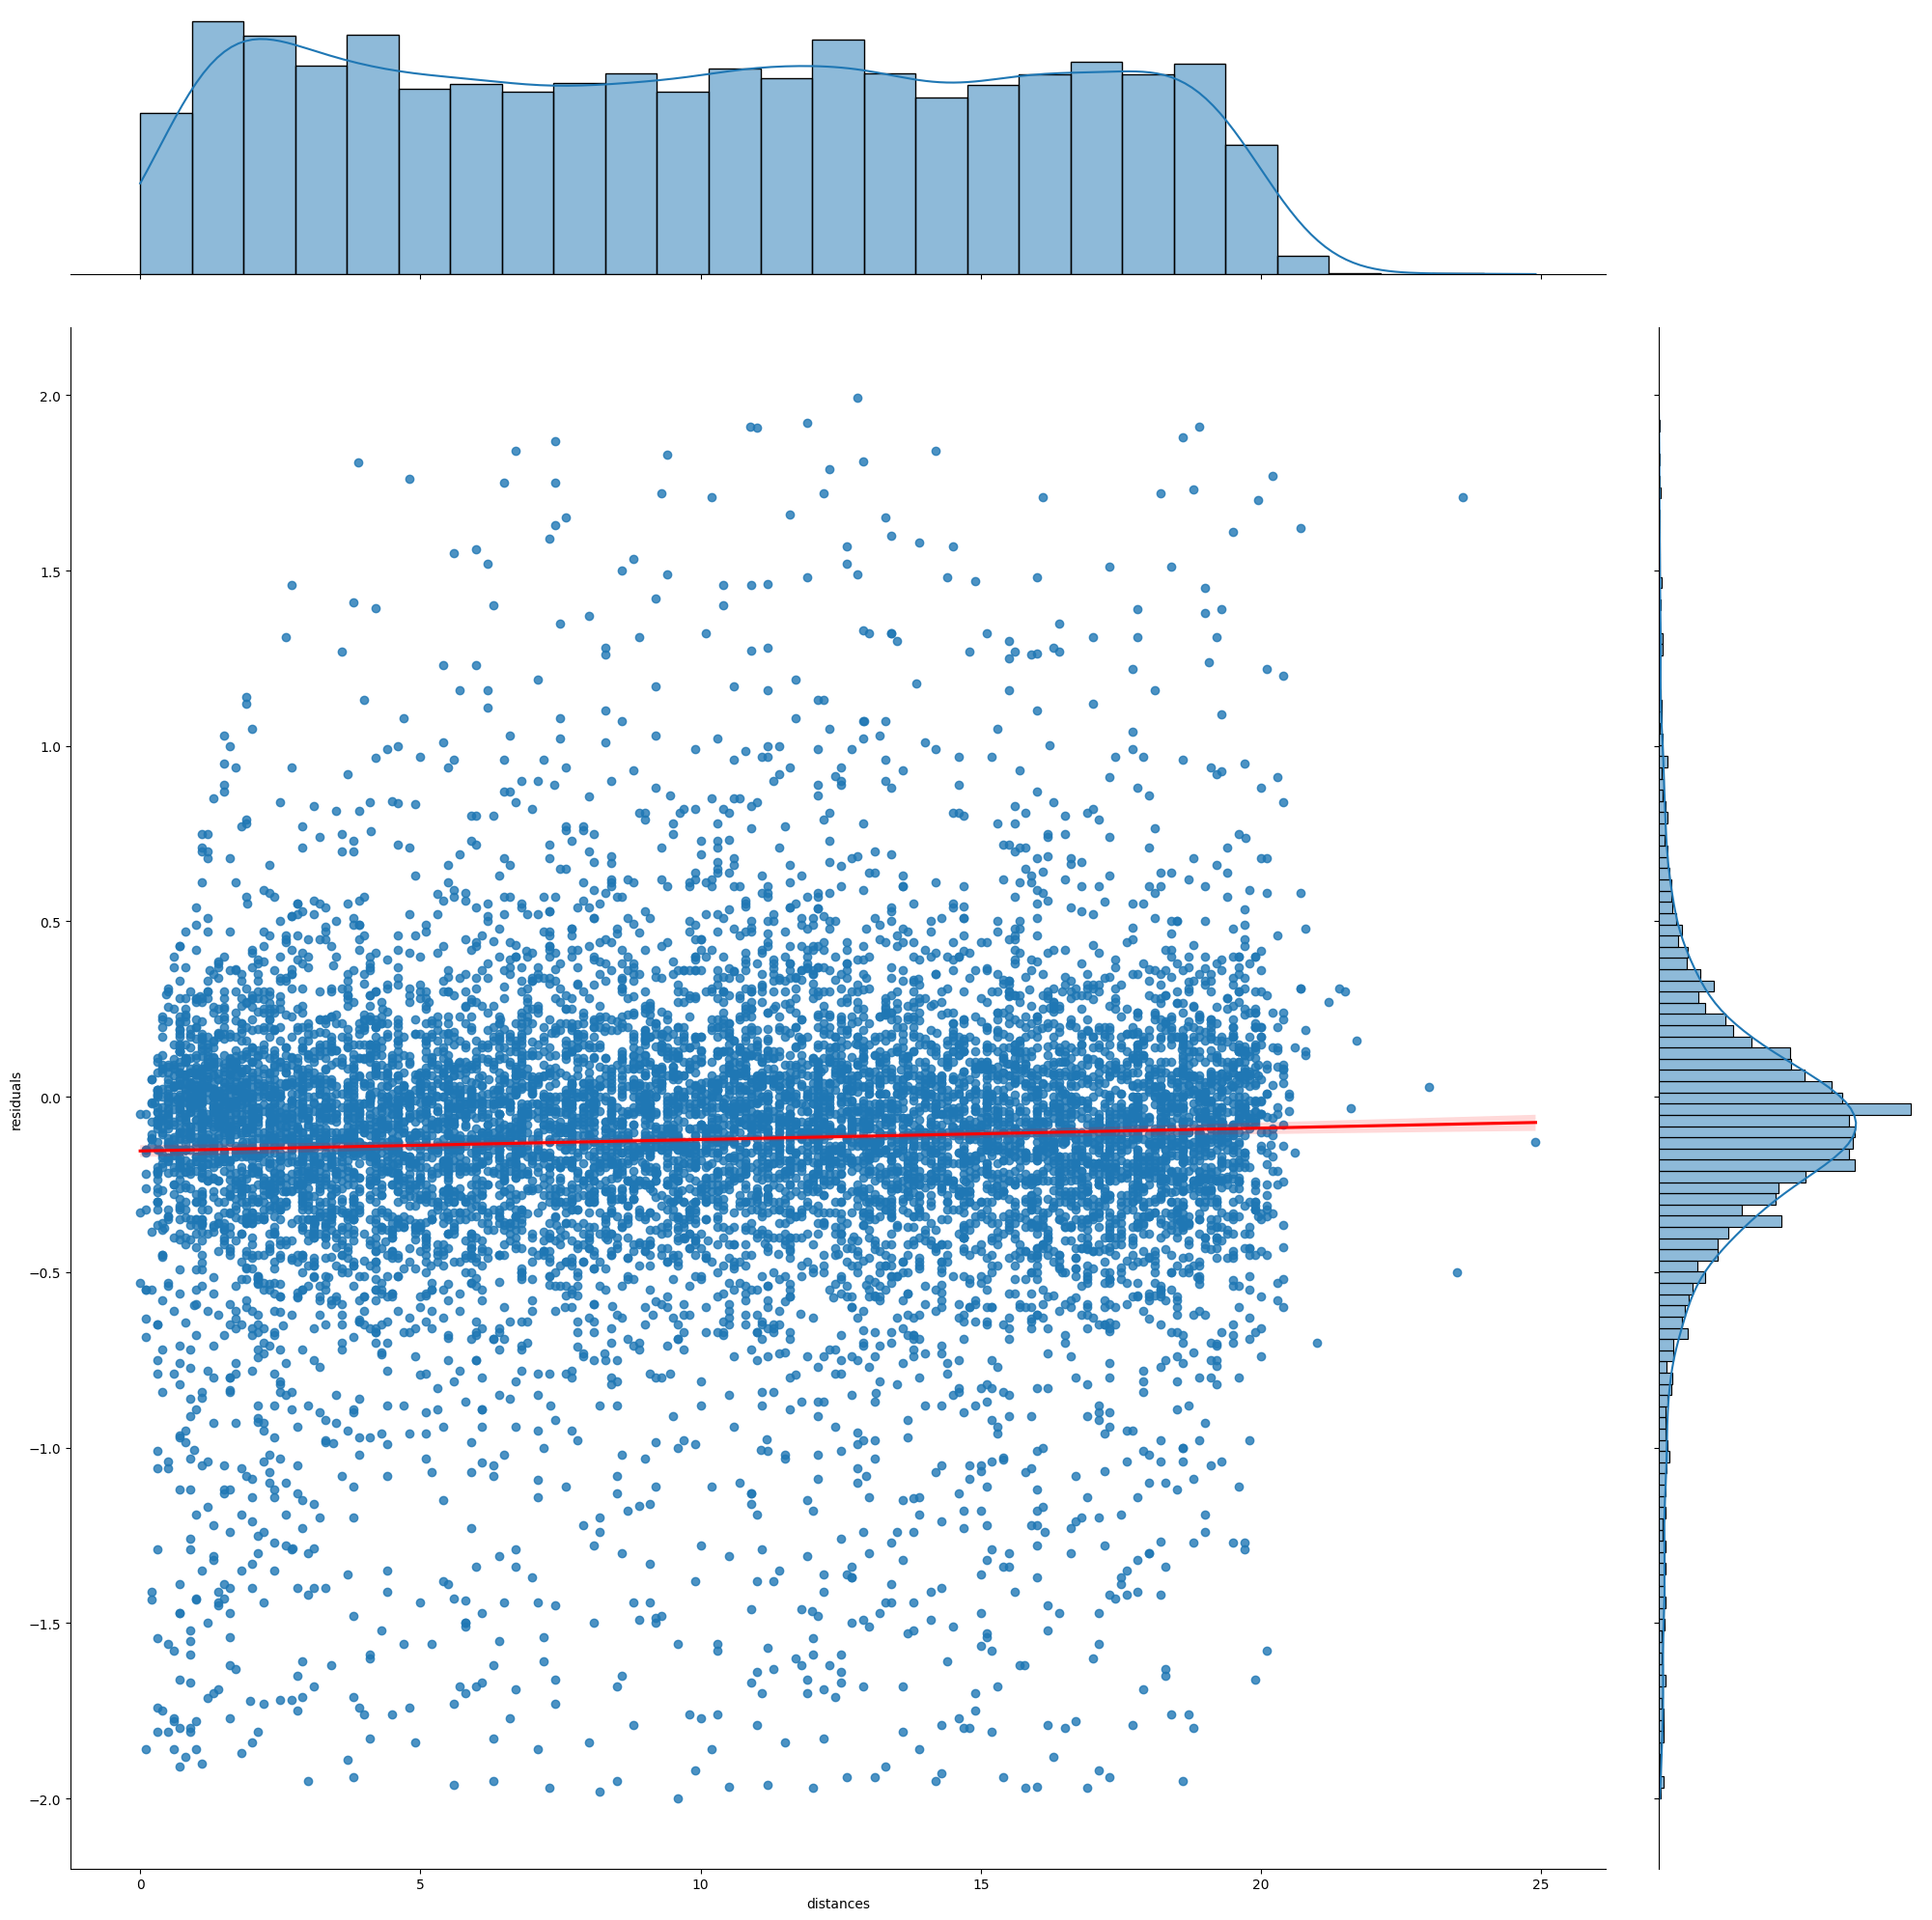

In [26]:
sns.jointplot(data = df, y="residuals",x = "distances",height=20,kind="reg",joint_kws={"line_kws":{"color": "r"}})

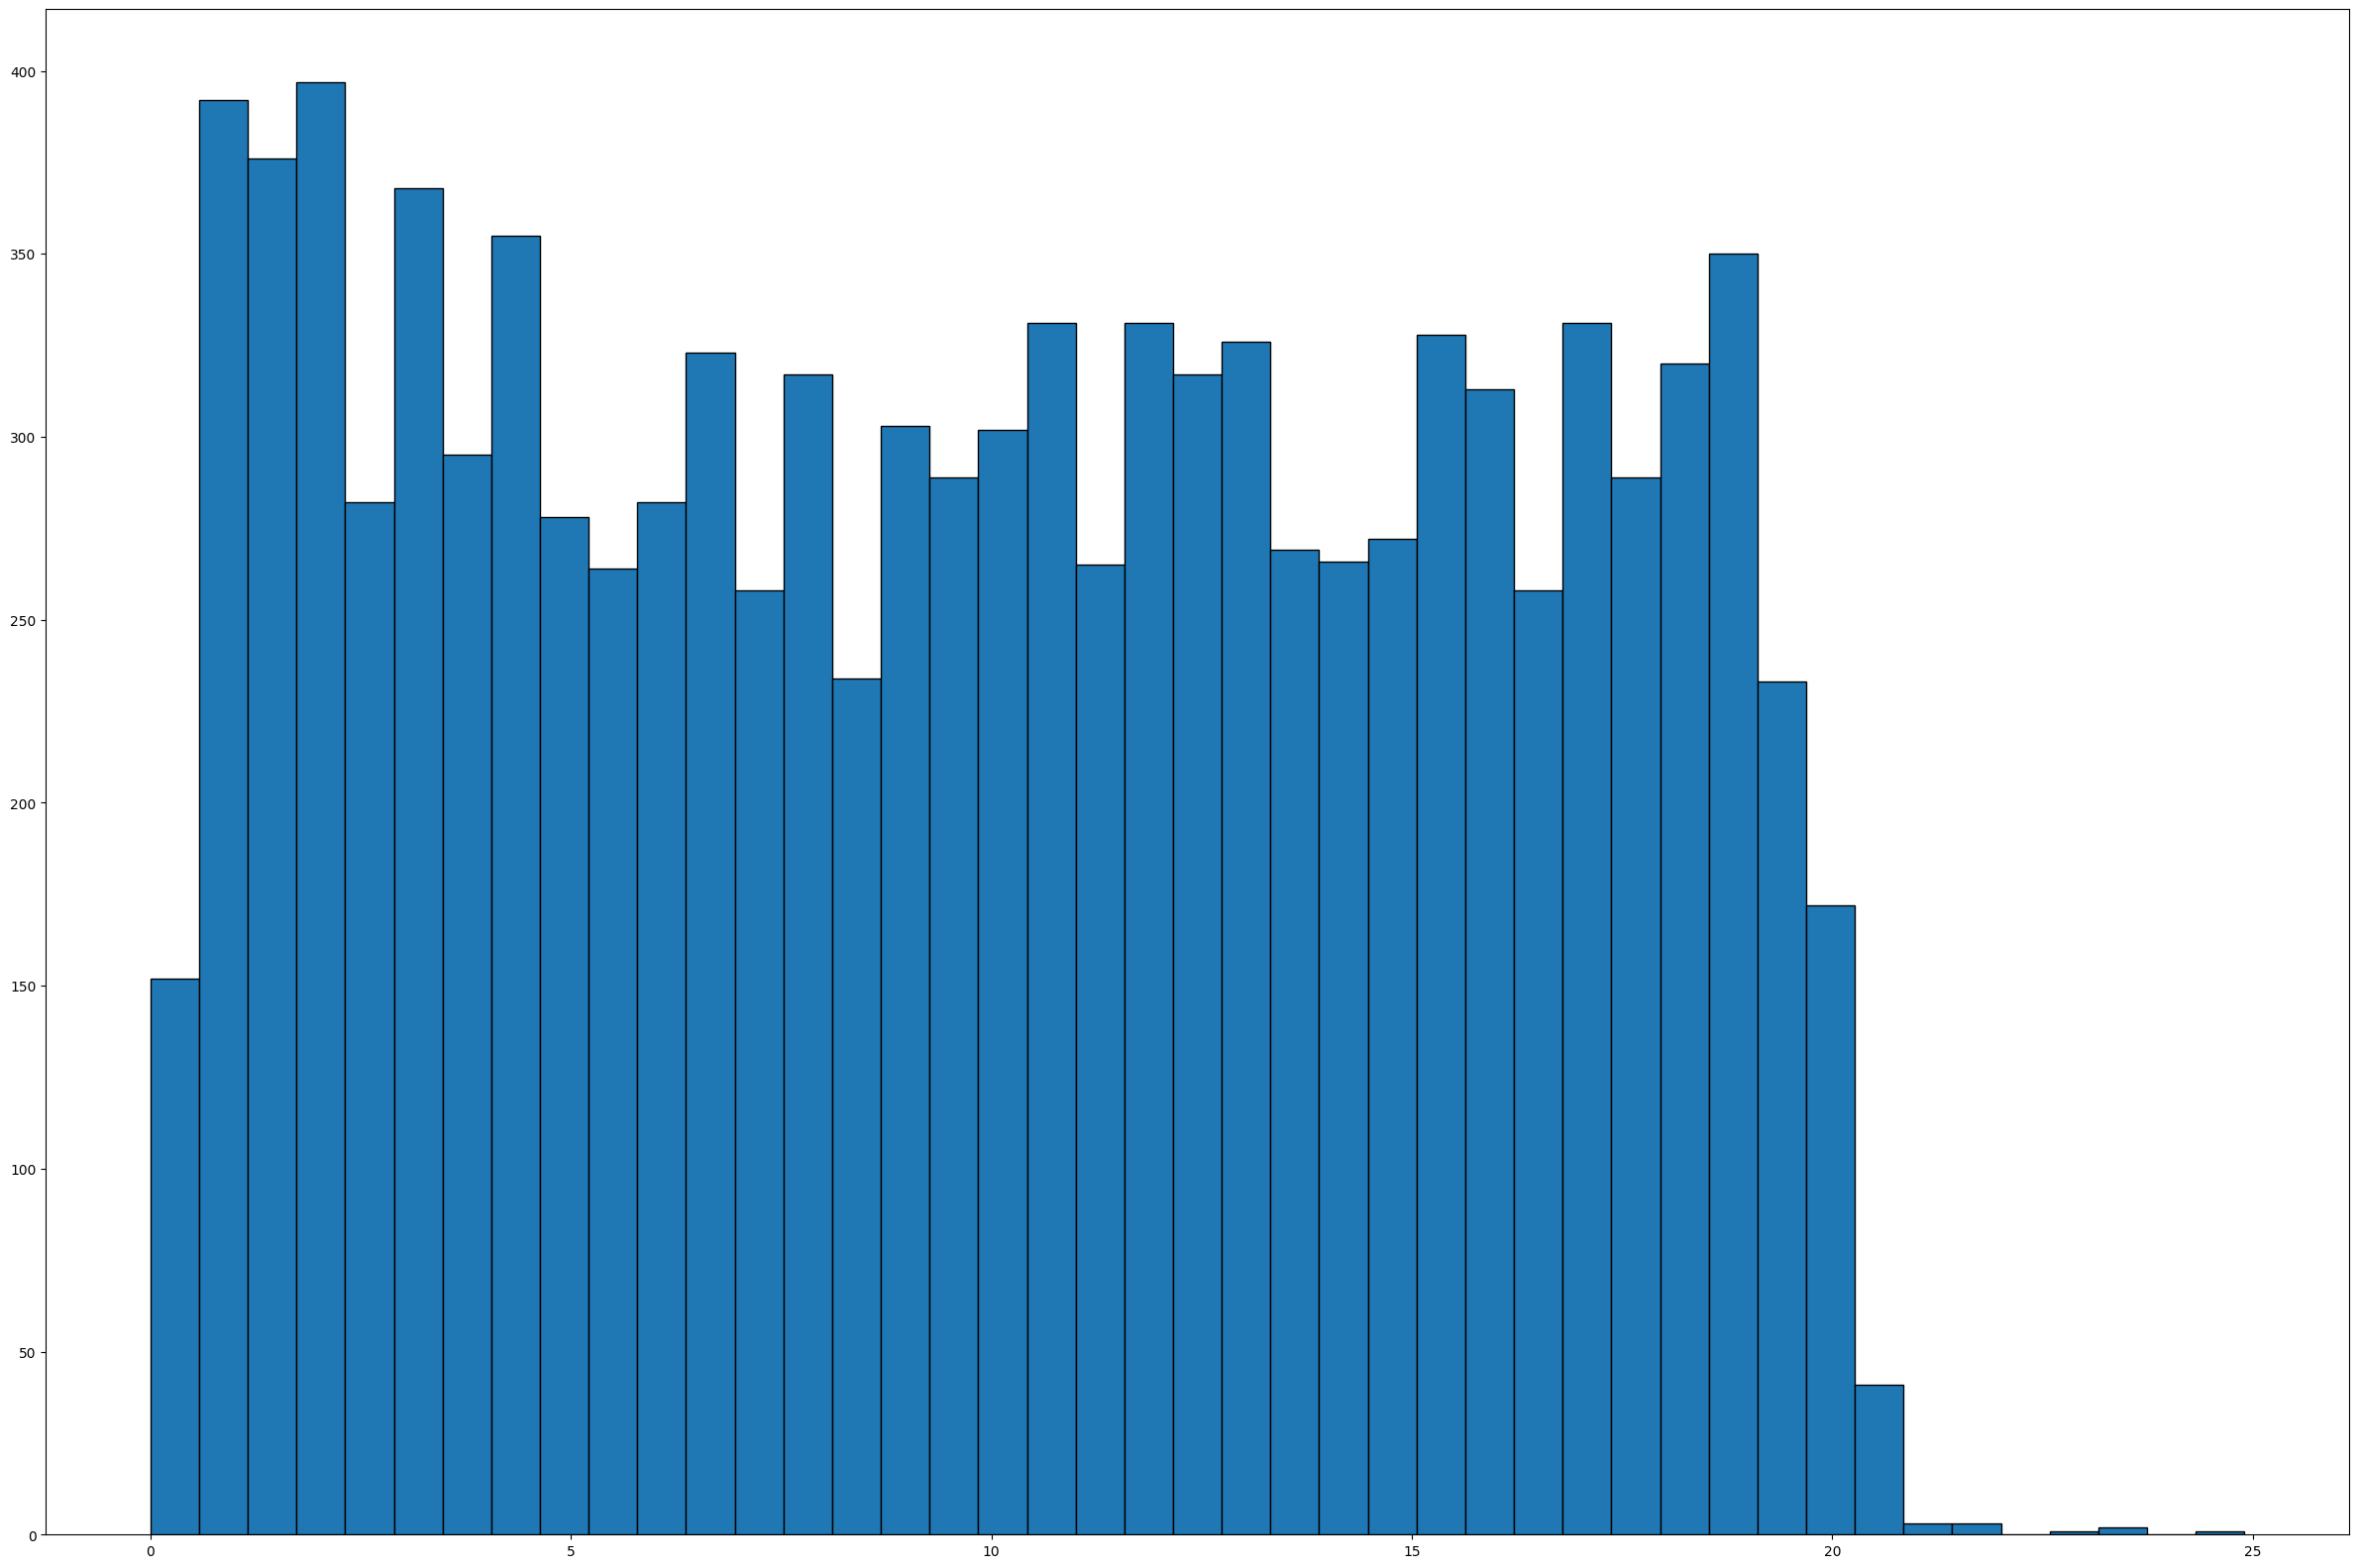

In [28]:
distances = df["distances"].to_numpy() #converting serie to numpy

#number of bins with Rice's method
n_bins = int(2*(len(distances)**(1/3)))

figure, ax = plt.subplots(1,figsize=(30,20))
n,edges,_ = ax.hist(distances,bins = n_bins,edgecolor = "black")


In [30]:
x = []
y = []
err_y = []
for i in range(1,len(edges)):
    
    #center of the current bin
    x.append((edges[i]+edges[i-1])/2) 
    
    #mean of the residuals in the current bin
    y.append(np.mean(df[(edges[i-1]<=df["distances"]) &(df["distances"]<edges[i])]["residuals"].to_numpy()))
    
    #std of the residuals in the current bin
    err_y.append(np.std(df[(edges[i-1]<=df["distances"]) &(df["distances"]<edges[i])]["residuals"].to_numpy()))


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype

Text(0, 0.5, 'residuals')

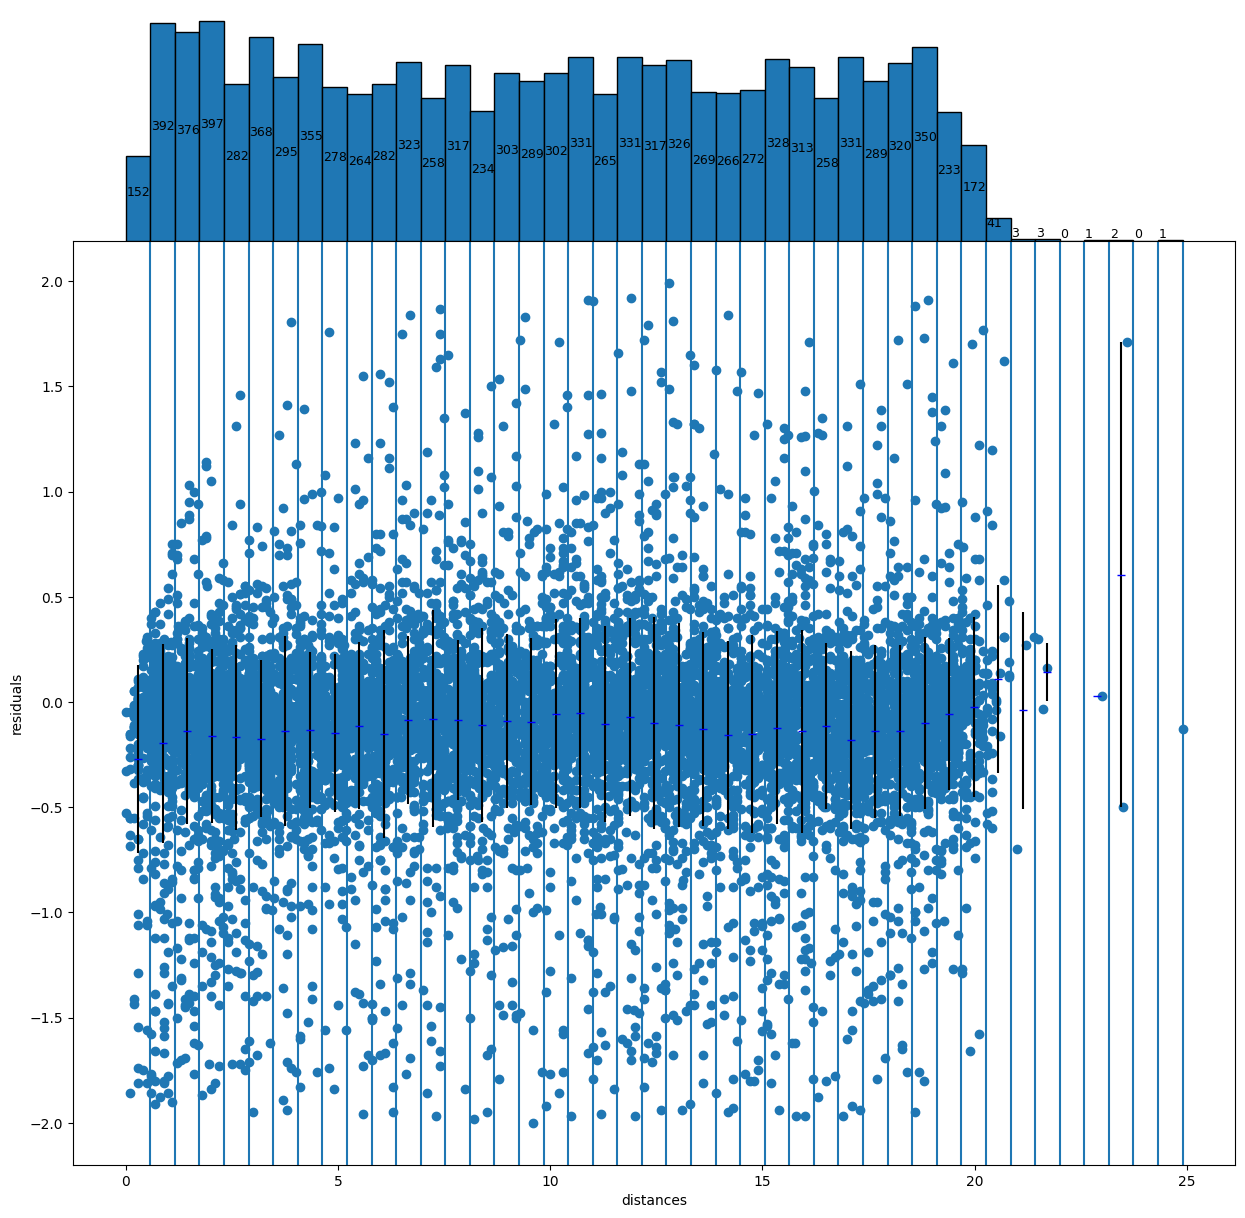

In [31]:
#creating the figure and the grid space:
#2 axes with no horizontal space and the first with a smaller ratio than the second one
fig = plt.figure(figsize=(15,15))
grid = fig.add_gridspec(2,1,hspace=0,height_ratios=(1, 4))

#adding the axes vith a common axis(the horizontal one)
ax_scatter = fig.add_subplot(grid[1])
ax_hist = fig.add_subplot(grid[0], sharex=ax_scatter)

#plotting the histogram
count,bins_edges,_= ax_hist.hist(distances,bins = n_bins,edgecolor = "black")
ax_hist.axis("off")

i=0
for n in count:
    ax_hist.text(x[i]-0.27,n/2+5, str(int(n)),{"fontsize":9}) #showing the count in the histogram
    i+=1
    ax_scatter.axvline(bins_edges[i])

#plotting the scatter plot with the error bars
ax_scatter.errorbar(x,y,err_y,fmt="_",ecolor="k",color="b")
ax_scatter.scatter(y=df["residuals"],x=df["distances"])
ax_scatter.set_xlabel("distances")
ax_scatter.set_ylabel("residuals")

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


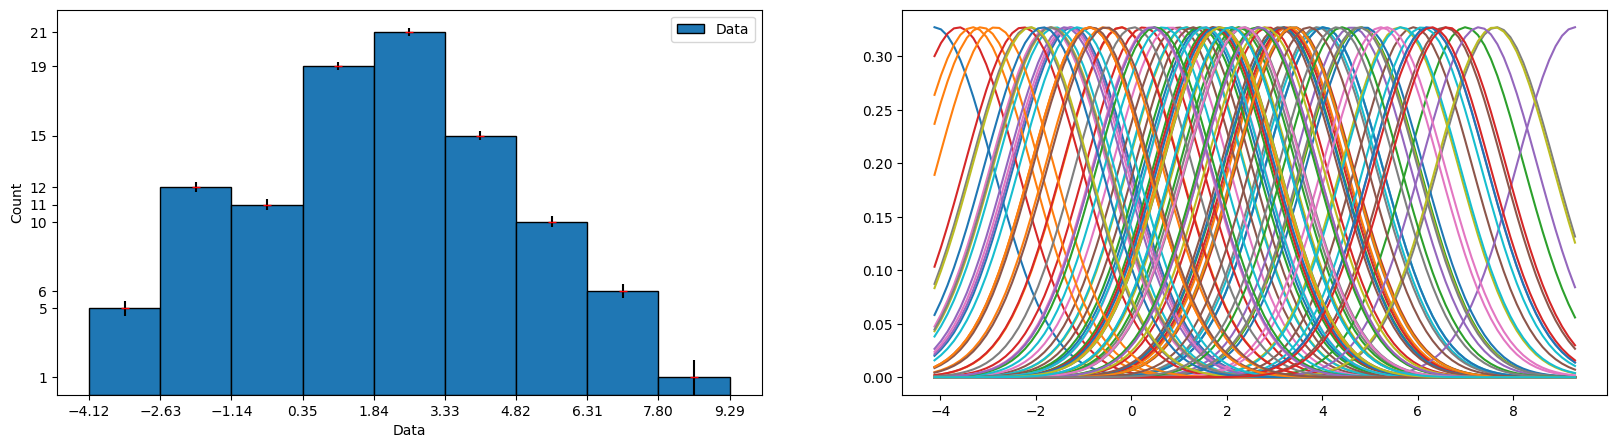

In [32]:
x = np.random.normal(2,3,100)

#Rice's method
n_bins = int(2*(len(x)**(1/3)))

fig, ax = plt.subplots(1, 2,figsize=(20,5))

#ploting the histogram and computing the bin centers
n,bin_edge,_=ax[0].hist(x, bins=n_bins,label="Data",edgecolor = "black")
ax[0].set_xlabel("Data")
ax[0].set_ylabel("Count")
ax[0].set_yticks(n)
ax[0].legend()
ax[0].set_xticks(bin_edge)
bin_center=np.array([0.5*(bin_edge[i]+bin_edge[i+1]) for i in range(0,len(bin_edge)-1)])

#computing the error
err_y=[]
for i in range(len(n)):
    if n[i]!=0:                       #if the bin is not empty
        err_y.append(1/mt.sqrt(n[i])) 
    else:                             #avoid division by zero 
        err_y.append(0)

#error
ax[0].errorbar(bin_center,n,err_y,fmt="_",ecolor="k",color="r")

#computing the normals distribution 
normals=[]
size = len(x)
std = 1.06*x.std()*(size)**(-1/5) #std equal for each norm
data = np.linspace(x.min(),x.max(),len(x))#reducing the computation inside the "space" of the histogram

#computing the normals with the different means
for mean in x:
    normals.append(sp.stats.norm.pdf(data,loc=mean,scale=std))

#plotting the normals r.v.
for normal in normals:
    ax[1].plot(data,normal)

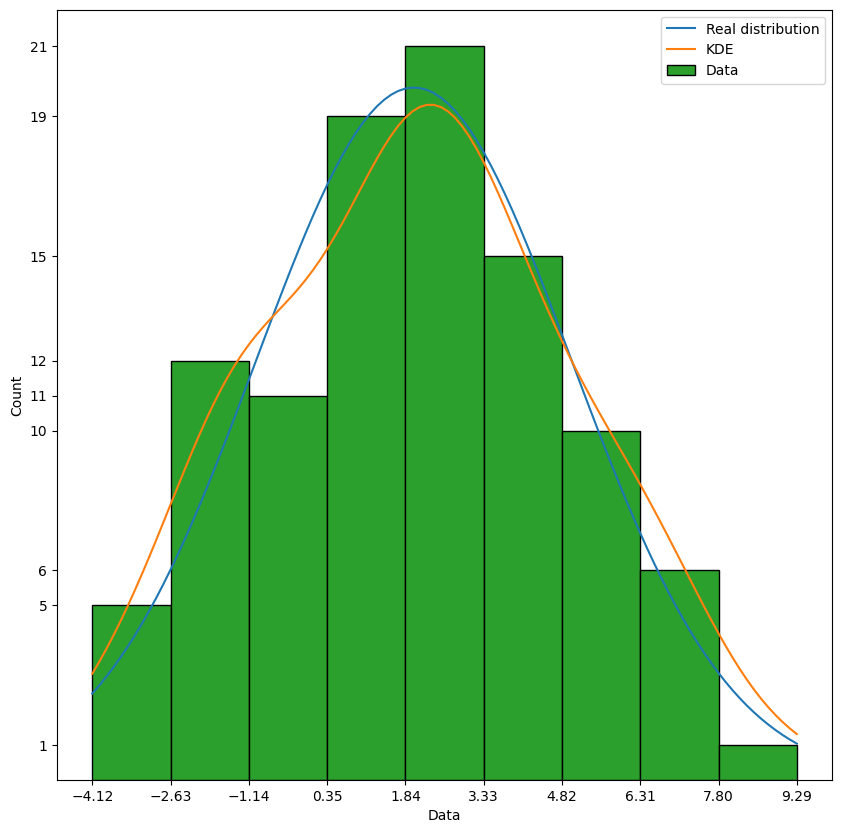

In [33]:
normals_sum = np.array(normals).sum(axis = 0) #sum of the normals 

dx = np.array([(bin_edge[i]-bin_edge[i-1]) for i in range(1,len(bin_edge))]) #computing the interval

normals_sum_area = sp.integrate.trapz(normals_sum,x=data) #computing the area of the sum of the normals

#i prefere to compute the area manually for the histogram
hist_area = 0
for i in range(len(dx)):
    hist_area+=n[i]*dx[i]

#normalizing the sum => distribution/area * histogram area
normalized_sum = (normals_sum/normals_sum_area)*hist_area

#plotting
fig, ax = plt.subplots(1,figsize=(10,10))

ax.plot(data,sp.stats.norm.pdf(data,2,3)*hist_area, label = "Real distribution")
ax.plot(data,normalized_sum,label="KDE")
ax.hist(x, bins=n_bins,label="Data",edgecolor = "black")
ax.set_xlabel("Data")
ax.set_ylabel("Count")
ax.set_yticks(n)
ax.set_xticks(bin_edge)
ax.legend()